# Time Series Forecasting (ARIMA)
## Objective: Forecast Stock Prices using ARIMA (AutoRegressive Integrated Moving Average).
### Note: We use this as a robust statistical baseline to compare against our Deep Learning (LSTM) model.

In [1]:
# ⚠️ AUTO-FIX: Run this cell first to install missing libraries in your current environment
import sys
!{sys.executable} -m pip install tensorflow statsmodels yfinance pandas numpy scikit-learn matplotlib seaborn
print('Libraries installed successfully! You can now run the rest of the notebook.')


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip
Libraries installed successfully! You can now run the rest of the notebook.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [3]:
# Load Data
df = pd.read_csv('../data/nifty50_2000_2025_11_30.csv', header=[0, 1], index_col=0, parse_dates=True)
df.columns = [col[0] for col in df.columns]

# Use Closing Price
data = df['Close']

# Train-Test Split (95% Train, 5% Test)
train_size = int(len(data) * 0.95)
train, test = data[0:train_size], data[train_size:len(data)]

print('Train Size:', len(train))
print('Test Size:', len(test))

Train Size: 4241
Test Size: 224


In [4]:
# Fit ARIMA Model
# Order (p,d,q) = (5,1,0) is a common starting point for stock data
# p=5 (lag observations), d=1 (differencing to make stationary), q=0 (moving average)
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

print(model_fit.summary())

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4241
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -26126.641
Date:                Sun, 30 Nov 2025   AIC                          52265.283
Time:                        16:23:55   BIC                          52303.396
Sample:                             0   HQIC                         52278.753
                               - 4241                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0015      0.008      0.188      0.851      -0.014       0.017
ar.L2          0.0173      0.008      2.112      0.035       0.001       0.033
ar.L3         -0.0186      0.009     -2.035      0.0

In [5]:
# Forecast
history = [x for x in train]
predictions = []

# Walk-Forward Validation (Simulating real-time prediction)
print('Starting Forecast (this may take a moment)...')
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

print('Forecasting Complete.')

Starting Forecast (this may take a moment)...


/var/folders/bw/5tc2sfgd3_dg6w_6rv0h5zq80000gn/T/ipykernel_84393/2556954721.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


Forecasting Complete.


In [6]:
# Evaluation
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'ARIMA RMSE: {rmse:.2f}')

ARIMA RMSE: 181.86


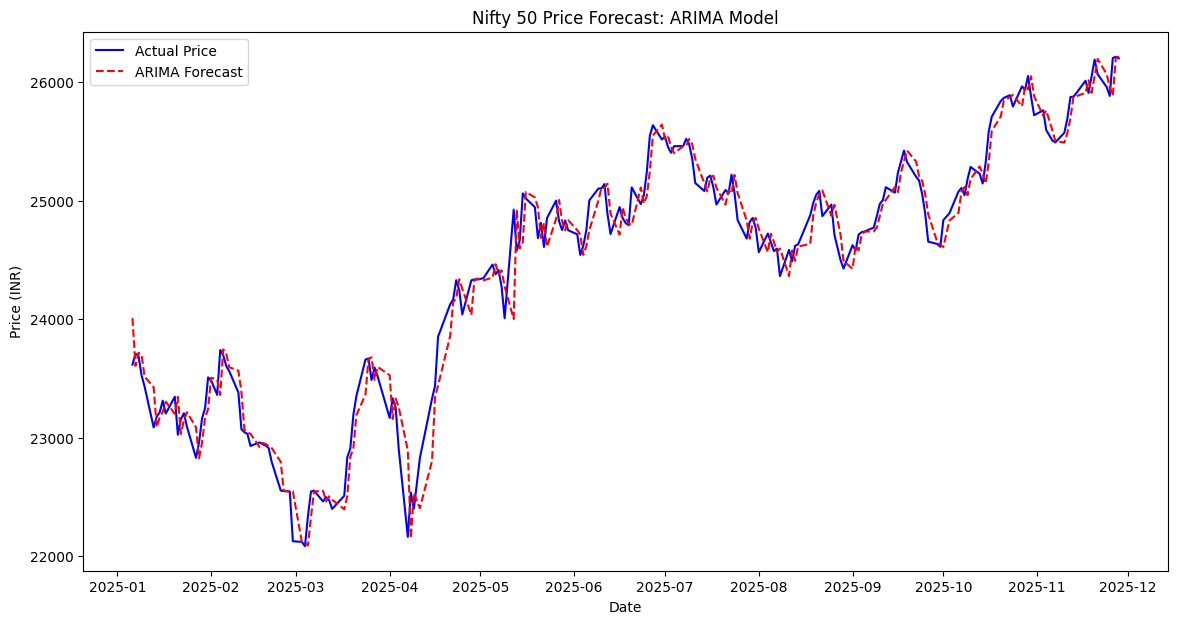

In [7]:
# Visualize Results
plt.figure(figsize=(14, 7))
plt.plot(test.index, test, label='Actual Price', color='blue')
plt.plot(test.index, predictions, label='ARIMA Forecast', color='red', linestyle='--')
plt.title('Nifty 50 Price Forecast: ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()